In [147]:
import copy
import numpy as np

class linearCongruential:
    def __init__(self, A=1664525, B=1013904223, M=2<<32, X_0=42):
        self.a = A
        self.b = B
        self.m = M
        self.x_0 = X_0
        
    def getRandomInt(self):
        self.x_0 = ( self.a * self.x_0 + self.b ) % self.m
        return self.x_0
    
    def getRandomFloat(self):
        return self.getRandomInt() / self.m
    
    def getBitRepresentation(self):
        return bin(self.getRandomInt())
    
    def getPeriod(self):
        # make sure we are in the circle
        self.getRandomInt()
        # make a real copy
        x_0_reference = copy.copy(self.x_0)
        # change the numer
        self.getRandomInt()
        counter = 1
        # do the loop
        while (x_0_reference != self.getRandomInt()):
            counter += 1
            if counter > 2<<22:
                print("Interrupt: period is larger than ",2<<22)
                return counter
        return counter
    
    def createListOfPairs(self, numPairs=2000):
        listOfPairs = []
        for i in range(numPairs):
            pair = [self.getRandomFloat(), self.getRandomFloat()]
            listOfPairs.append(pair)
        return listOfPairs
    
    def createListOfTriples(self, numTriples=2000):
        listOfTriples = []
        for i in range(numTriples):
            pair = [self.getRandomFloat(), self.getRandomFloat(), self.getRandomFloat()]
            listOfTriples.append(pair)
        return listOfTriples
    
    def writeSeriesToFile(self, filename ="myRandomSeries.dat", numOfNumbers=256):
        listOfNumbers = []
        for i in range(numOfNumbers):
            listOfNumbers.append(self.getRandomInt())
        np.savetxt(filename, listOfNumbers)

In [164]:
molger = linearCongruential(62113, 27521, 4286856)

In [151]:
molger.getRandomInt()

29059697

In [80]:
molger.getRandomFloat()

0.06233062330623306

In [81]:
molger.getBitRepresentation()

'0b1011110010001'

In [165]:
molger.getPeriod()

1871

In [138]:
molger.writeSeriesToFile()

In [155]:
someList = molger.createListOfPairs(20000)

In [156]:
someListX = [ x[0] for x in someList]

In [157]:
someListY = [ x[1] for x in someList]

In [141]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

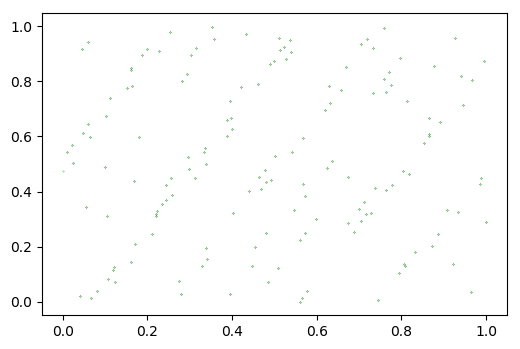

In [173]:
# Spektraltest
molger = linearCongruential(48271, 0, 4286856)
someList = molger.createListOfPairs(molger.getPeriod())
someListX = [ x[0] for x in someList]
someListY = [ x[1] for x in someList]
plt.figure(dpi=100)
plt.plot(someListX,someListY,'.g', ms=0.4)
plt.show()

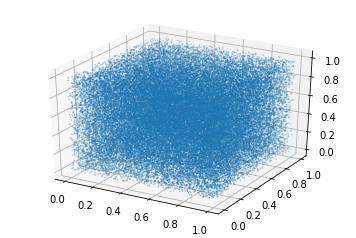

In [153]:
myList = molger.createListOfTriples(60000)
mylistX = [ x[0] for x in myList]
mylistY = [ x[1] for x in myList]
mylistZ = [ x[2] for x in myList]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mylistX, mylistY, mylistZ, s=0.1)
plt.show()